# Install dependencies

In [6]:
! conda install -c conda-forge xgboost --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    libxgboost-1.0.2           |       he1b5a44_1         2.8 MB  conda-forge
    py-xgboost-1.0.2           |   py36h9f0ad1d_1         2.2 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    xgboost-1.0.2              |   py36h831f99a_1          11 KB  conda-forge
    ------------

In [1]:
import xgboost

In [10]:
! pip install 'scikit-learn==0.23.1'

    100% |████████████████████████████████| 6.9MB 4.7MB/s eta 0:00:01  0% |▎                               | 61kB 2.9MB/s eta 0:00:03    7% |██▍                             | 512kB 8.6MB/s eta 0:00:01    90% |█████████████████████████████   | 6.2MB 24.6MB/s eta 0:00:01
    100% |████████████████████████████████| 13.5MB 2.5MB/s eta 0:00:01   37% |████████████                    | 5.0MB 25.1MB/s eta 0:00:01    46% |██████████████▊                 | 6.2MB 25.2MB/s eta 0:00:01    54% |█████████████████▌              | 7.4MB 23.9MB/s eta 0:00:01    70% |██████████████████████▋         | 9.5MB 9.4MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1


In [4]:
! pip install scipy --upgrade

    100% |████████████████████████████████| 25.9MB 1.4MB/s ta 0:00:011 0% |▏                               | 143kB 811kB/s eta 0:00:32    1% |▍                               | 348kB 2.9MB/s eta 0:00:09    7% |██▍                             | 2.0MB 11.0MB/s eta 0:00:03    11% |███▋                            | 2.9MB 10.7MB/s eta 0:00:03    13% |████▎                           | 3.5MB 9.8MB/s eta 0:00:03    14% |████▊                           | 3.8MB 10.2MB/s eta 0:00:03    38% |████████████▏                   | 9.9MB 4.8MB/s eta 0:00:04    50% |████████████████▎               | 13.1MB 7.0MB/s eta 0:00:02    75% |████████████████████████▎       | 19.6MB 8.8MB/s eta 0:00:01    92% |█████████████████████████████▊  | 24.0MB 8.7MB/s eta 0:00:01
  Found existing installation: scipy 0.19.1
    Uninstalling scipy-0.19.1:
      Successfully uninstalled scipy-0.19.1


In [2]:
import sklearn

# Load artifacts and datasets

In [3]:
import pickle
import pandas as pd
import numpy as np
import pylab as plt

%matplotlib inline

In [4]:
path_artifacts = "preproc_artifacts.pkl"

with open(path_artifacts, 'rb') as fin:
    artifacts = pickle.load(fin)

In [6]:
artifacts.keys()

dict_keys(['type_converter', 'value_checker', 'high_null_cols', 'num_imputer', 'cat_imputer', 'ord_encoder', 'low_var_cols', 'high_card_cols'])

In [7]:
artifacts['type_converter']

{'AGER_TYP': 'category',
 'ALTERSKATEGORIE_GROB': 'category',
 'ALTER_HH': 'category',
 'ANREDE_KZ': 'category',
 'ANZ_HAUSHALTE_AKTIV': 'float',
 'ANZ_HH_TITEL': 'float',
 'ANZ_PERSONEN': 'float',
 'ANZ_TITEL': 'float',
 'BALLRAUM': 'category',
 'BIP_FLAG': 'category',
 'CAMEO_DEUG_2015': 'category',
 'CAMEO_DEU_2015': 'category',
 'CAMEO_DEUINTL_2015': 'category',
 'CJT_GESAMTTYP': 'category',
 'D19_BANKEN_ANZ_12': 'category',
 'D19_BANKEN_ANZ_24': 'category',
 'D19_BANKEN_DATUM': 'category',
 'D19_BANKEN_DIREKT_RZ': 'category',
 'D19_BANKEN_GROSS_RZ': 'category',
 'D19_BANKEN_LOKAL_RZ': 'category',
 'D19_BANKEN_OFFLINE_DATUM': 'category',
 'D19_BANKEN_ONLINE_DATUM': 'category',
 'D19_BANKEN_ONLINE_QUOTE_12': 'category',
 'D19_BANKEN_REST_RZ': 'category',
 'D19_BEKLEIDUNG_GEH_RZ': 'category',
 'D19_BEKLEIDUNG_REST_RZ': 'category',
 'D19_BILDUNG_RZ': 'category',
 'D19_BIO_OEKO_RZ': 'category',
 'D19_BUCH_RZ': 'category',
 'D19_DIGIT_SERV_RZ': 'category',
 'D19_DROGERIEARTIKEL_RZ': 'ca

In [10]:
path_population = "Udacity_AZDIAS_052018_preproc.csv"
path_customers = "Udacity_CUSTOMERS_052018_preproc.csv"

In [36]:
population_df = pd.read_csv(path_population, dtype=artifacts['type_converter'])
customers_df = pd.read_csv(path_customers, dtype=artifacts['type_converter'])

**To create the customer segmentation report, clustering was suggested, however, it's not a good idea, at least for this dataset. Let's see why:**

In [37]:
customers_df.head()

,LNR,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,GEBURTSJAHR,KBA13_ANZAHL_PKW,MIN_GEBAEUDEJAHR,AGER_TYP,BALLRAUM,...,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,VERS_TYP,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626.0,1.000000,0.000000,2.0,0.0,0.0,1201.000000,1992.000000,3.0,2.0,...,5.0,0.0,5.0,4.0,1.0,5.0,8.0,6.0,0.0,3.0
1,9628.0,4.965863,0.067413,3.0,0.0,0.0,667.231216,1993.056659,0.0,5.0,...,2.0,0.0,6.0,4.0,1.0,5.0,8.0,3.0,0.0,3.0
2,143872.0,1.000000,0.000000,1.0,0.0,0.0,433.000000,1992.000000,0.0,6.0,...,1.0,0.0,2.0,2.0,2.0,5.0,8.0,2.0,1.0,3.0
3,143873.0,0.000000,0.067413,0.0,0.0,0.0,755.000000,1992.000000,2.0,6.0,...,5.0,3.0,6.0,1.0,1.0,5.0,8.0,6.0,0.0,3.0
4,143874.0,7.000000,0.000000,4.0,0.0,1960.0,513.000000,1992.000000,0.0,2.0,...,3.0,3.0,4.0,2.0,2.0,1.0,8.0,3.0,0.0,2.0


In [38]:
customers_df.dtypes

LNR                            float64
ANZ_HAUSHALTE_AKTIV            float64
ANZ_HH_TITEL                   float64
ANZ_PERSONEN                   float64
ANZ_TITEL                      float64
GEBURTSJAHR                    float64
KBA13_ANZAHL_PKW               float64
MIN_GEBAEUDEJAHR               float64
AGER_TYP                      category
BALLRAUM                      category
CJT_GESAMTTYP                 category
D19_BANKEN_ANZ_12             category
D19_BANKEN_ANZ_24             category
D19_BANKEN_DATUM              category
D19_BANKEN_OFFLINE_DATUM      category
D19_BANKEN_ONLINE_DATUM       category
D19_BANKEN_ONLINE_QUOTE_12    category
D19_GESAMT_ANZ_12             category
D19_GESAMT_ANZ_24             category
D19_GESAMT_DATUM              category
D19_GESAMT_OFFLINE_DATUM      category
D19_GESAMT_ONLINE_DATUM       category
D19_KONSUMTYP                 category
D19_TELKO_DATUM               category
D19_TELKO_OFFLINE_DATUM       category
D19_VERSAND_ANZ_12       

**8 numeric columns out of 250, which is 3.2% of the total columns. We will be loosing way too much information if we only use the numeric features to perform clustering. Other approaches could be using k-modes, but we are going to test something else.**

## Train a model

We are going to train a supervised classification model to see if there are patterns that differentiate customers from the rest of the population.

In [39]:
customers_df['target'] = 1
population_df['target'] = 0

In [40]:
dataset = pd.concat([customers_df, population_df])

In [41]:
dataset.shape

(383304, 251)

In [42]:
x = dataset.drop(columns=['LNR', 'target']) # Remember to remove LNR when making predictions
x = x.astype(float) # We have used ordinal encoding for categorical values, hence we just need to convert the data type
y = dataset['target']

In [43]:
del customers_df
del population_df
del dataset

In [44]:
clf = xgboost.XGBClassifier()

In [45]:
clf = clf.fit(x,y)

## Analyze performance

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
y_pred = clf.predict(x)

In [48]:
accuracy_score(y, y_pred)

0.8376119216079143

This is very good as the model is telling us that it is capable to separate people that it is already a customer from the total population in general. It means there are clear patterns that the customers present and we can use to target potential new customers.

Not having a perfect score is good in 2 ways: first because the model is not overfitting the data and second, but the most important one, is that there are people from population dataset that are being missclasified as customers because they shows similar patterns, hence are very likely to become the following customers. We should focus inmediately in this subset of people to begin with marketing campaigns.

## Interpretability

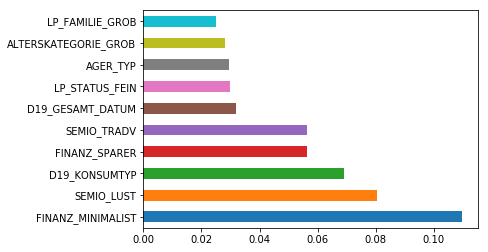

In [51]:
feat_importances = pd.Series(clf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

These are the key indicators that allows to separate customers from general population, hence it indicate us the most important traits our customers have, which will guide us to find new customers.

For instance, we can analyze the distribution of categories for the feature with the highest predictive power which is 'FINANZ_MINIMALIST'

In [53]:
import seaborn as sns

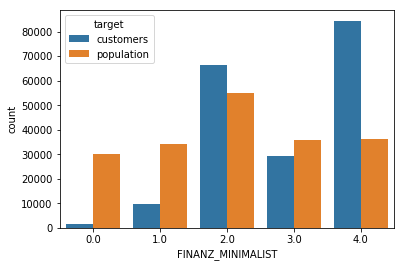

In [61]:
_ = sns.countplot(x['FINANZ_MINIMALIST'], hue=y.replace({0:'population', 1:'customers'}))

This is very powerful to segment the database, and it is specially useful for a case like this where we have a huge number of categorical features.